In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("weatherAUS.csv")   
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# Data Preprocessing

Also, we can see from above that the Inoput column 'Date' is being taken as object type Data. Which is not correct. So, Changing the Date Column into Date DataType.

Also, making separate columns for Day & Month for using in M.L Models & Better Data Vizualization.

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].apply(lambda x:x.year)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [7]:
#Dropping Date Column as now separate columns exists

df.drop('Date',axis=1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [8]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Year                0
Month               0
Day                 0
dtype: int64

<AxesSubplot:>

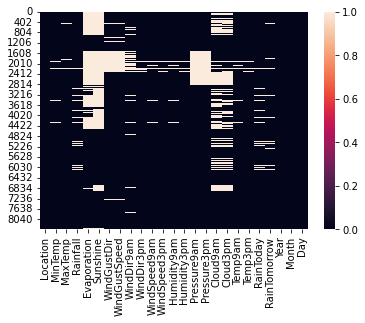

In [9]:
sns.heatmap(df.isnull())

From above we can see that there are Null Values present in many columns. We will treat these Null values later.

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,2012.102433,6.442136,15.741958
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,2.473137,3.437994,8.787354
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000,1.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,2010.000000,3.000000,8.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,2011.000000,6.000000,16.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,2014.000000,9.000000,23.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000,31.000000


<AxesSubplot:>

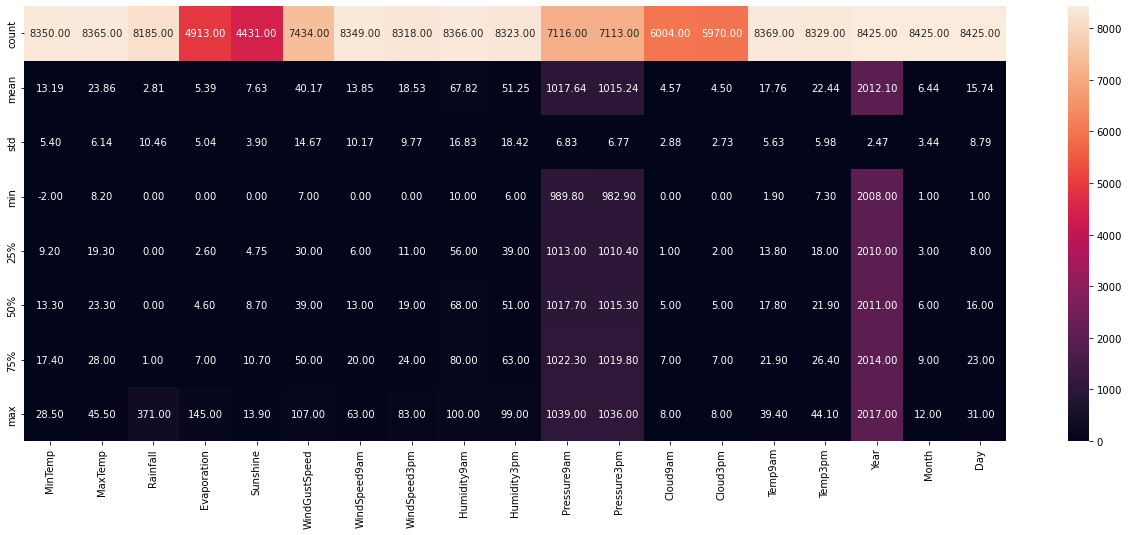

In [11]:
plt.figure(figsize=(22,8))
sns.heatmap(df.describe(),annot=True,fmt="0.2f")

From above we can see that:-

   1. Mean > Median for 'Rainfall', 'Evaporation' means that data in these columns is Right Skewed Data.
   2. Big difference present b/w 75% percentile & Maximum of the column for 'MaxTemp','Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am','WindSpeed3pm' & 'Temp3pm' means that ouliers are present in these columns.

# Exploratory Data Analysis & Visualization

UNIVARIATE ANALYSIS

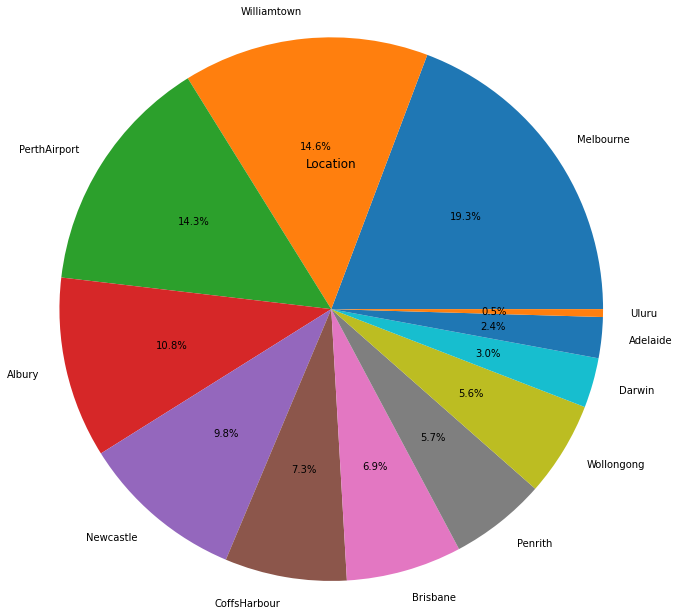

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


In [12]:
lb = df['Location'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=2.5, autopct='%1.1f%%')
plt.title("Location")
plt.show()
print(df['Location'].value_counts())

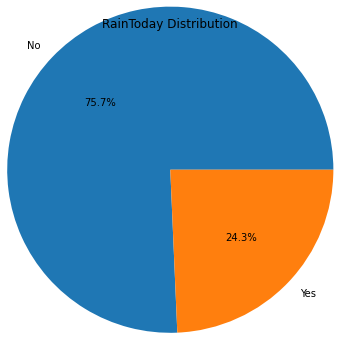

No     6195
Yes    1990
Name: RainToday, dtype: int64


In [13]:
lb = df['RainToday'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("RainToday Distribution")
plt.show()
print(df['RainToday'].value_counts())

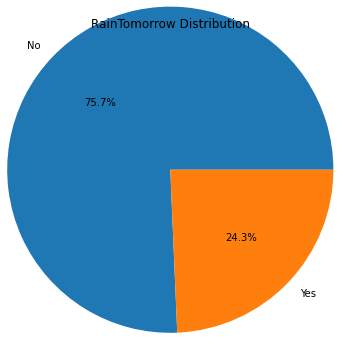

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64


In [14]:
lb = df['RainTomorrow'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("RainTomorrow Distribution")
plt.show()
print(df['RainTomorrow'].value_counts())

From above we can see that the probability of recieveng rain Today & Tommorow is same.

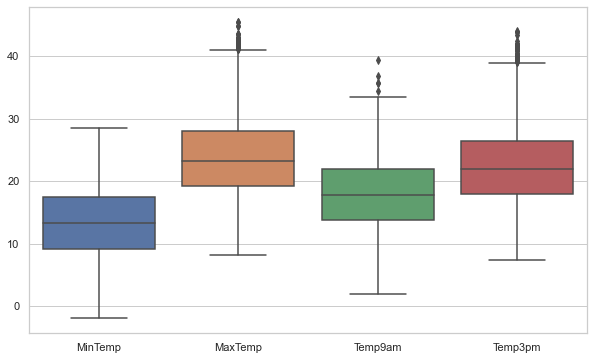

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['MinTemp','MaxTemp','Temp9am','Temp3pm']])
plt.show()

From above we can see that the Temp at 3 PM is gretter than at 9 AM. Also, ouliers are present in MaxTemp, Temp9am & Temp3pm columns.

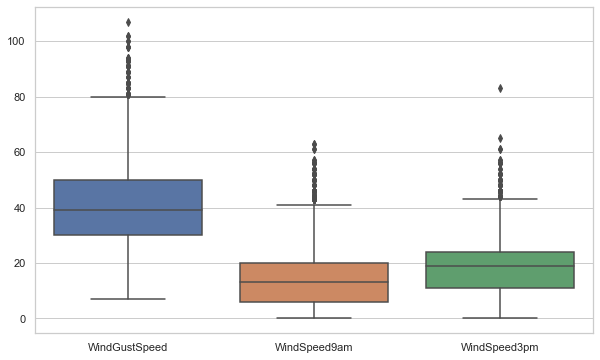

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])
plt.show()

From above we can see that the Wind Speed at 3 PM is more than that at 9 AM at most of the times. Also, ouliers are present in 'WindGustSpeed', 'WindSpeed9am' & 'WindSpeed3pm'

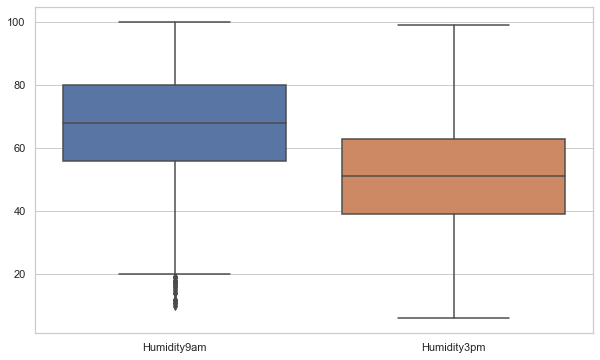

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Humidity9am','Humidity3pm']])
plt.show()

We can see that the Humidity at 9 AM is more than humidity at 3 PM mostly. Also, there are ouliers present in 'Humidity9am'.

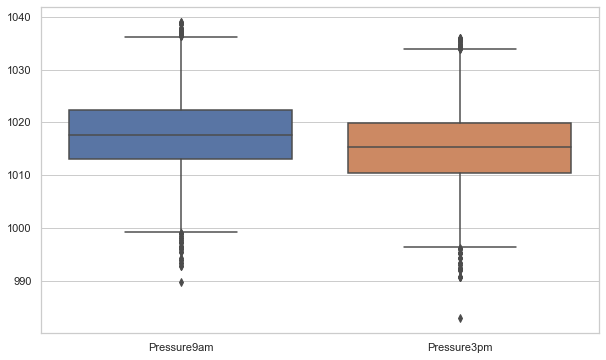

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Pressure9am','Pressure3pm']])
plt.show()

We can see that Pressure at 9 AM is more than pressure at 3 PM mostly. Also, outliers are present in Pressure9am & Pressure3pm column.

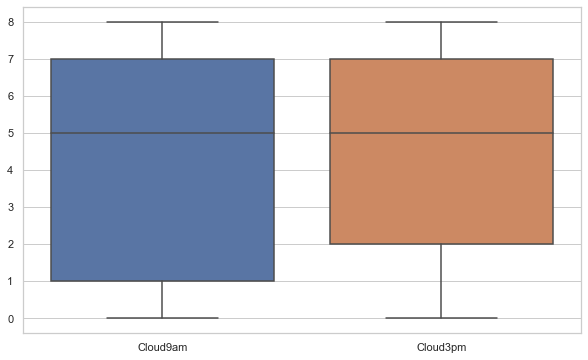

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Cloud9am','Cloud3pm']])
plt.show()

We can that there are almost equal clouds at 9 AM & 3 PM.

# Distribution Plots

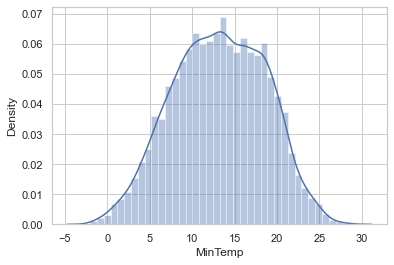

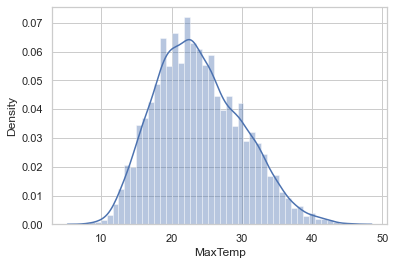

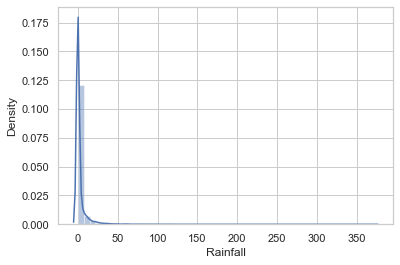

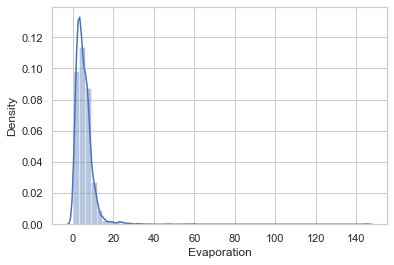

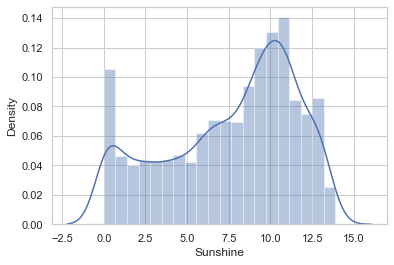

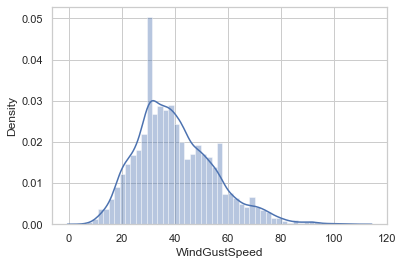

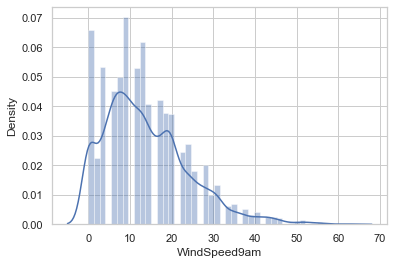

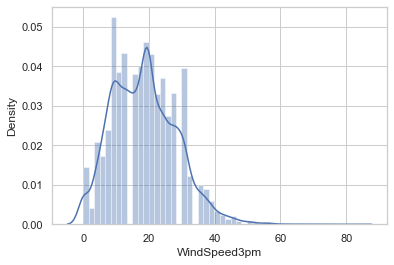

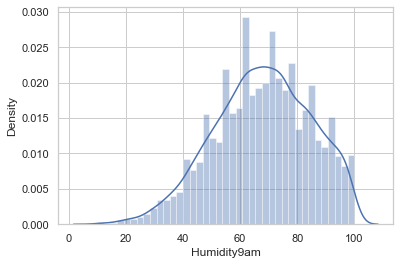

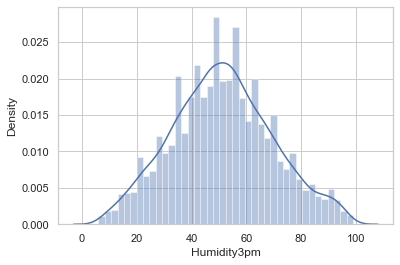

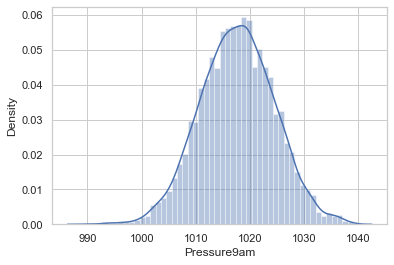

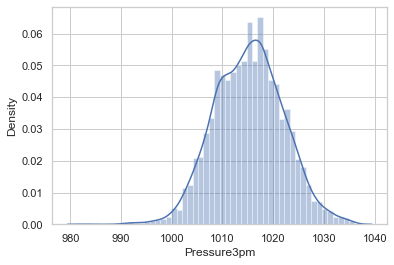

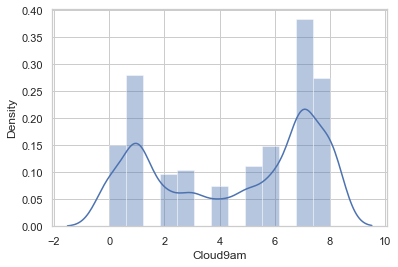

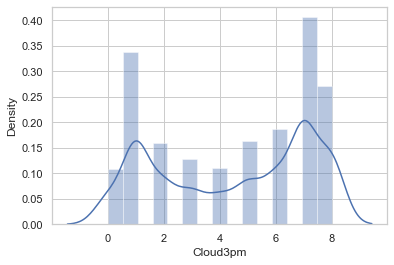

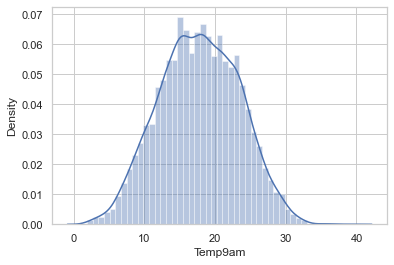

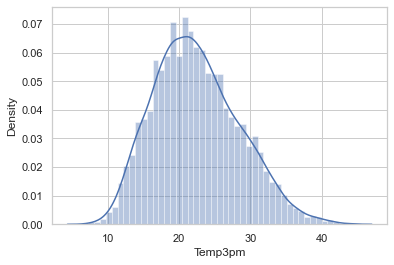

In [20]:
for i in df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]:
    sns.distplot(df[i])
    plt.show()

From above we can see that many continuous columns are skewed:-
   1. Right Skewed Columns - MaxTemp, Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm & Temp3pm
   2. Left Skewed Columns - Sunshine, Humidity9am, Pressure9am, Pressure3pm

BI-VARIATE ANALYSIS

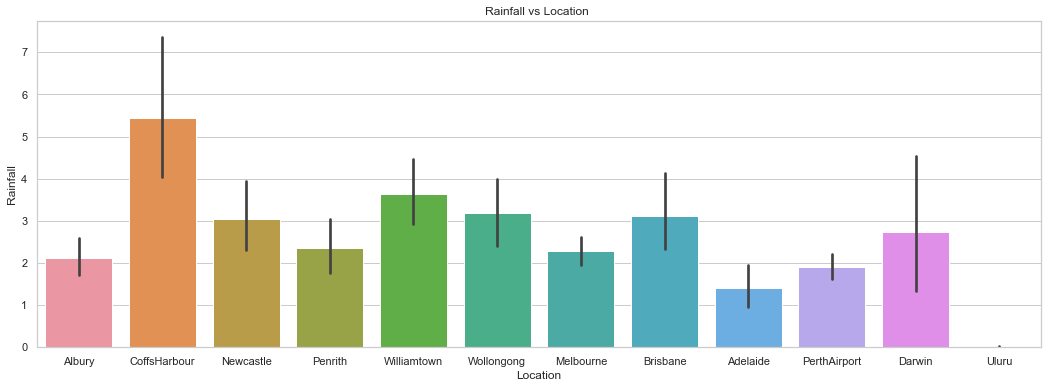

In [21]:
plt.figure(figsize=(18,6))
sns.barplot(x='Location',y='Rainfall',data=df)
plt.title("Rainfall vs Location ")
plt.show()

From above we can see that CoffsHarbour is recieving Highest amount of Rainfall followed by Williamtown & Melbourne. 

Whereas Uluru, Adelaide & Albury are recieving least amount of Rainfall. 

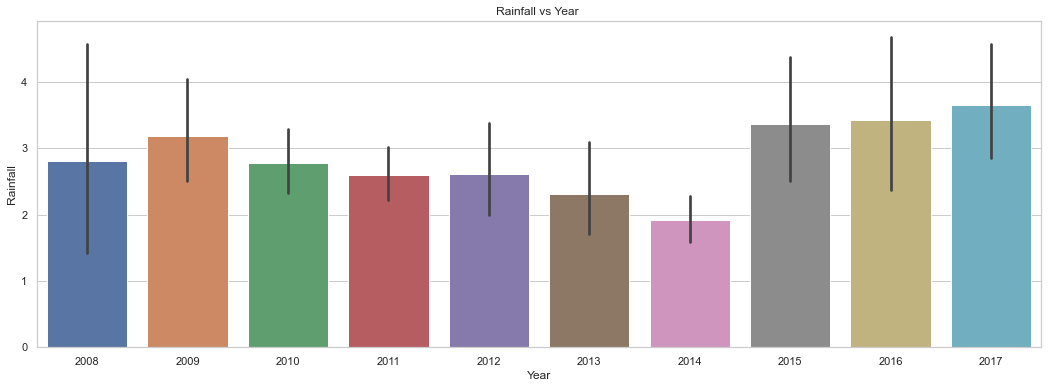

In [22]:
plt.figure(figsize=(18,6))
sns.barplot(x='Year',y='Rainfall',data=df)
plt.title("Rainfall vs Year ")
plt.show()

We can see that the Year 2014 recorded the Least amount of Rainfall, while Year 2017 recieved most amount of Rainfall.

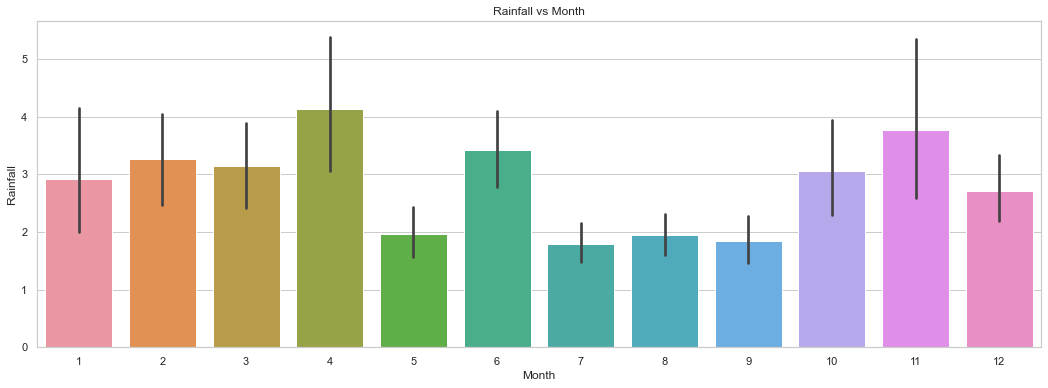

In [23]:
plt.figure(figsize=(18,6))
sns.barplot(x='Month',y='Rainfall',data=df)
plt.title("Rainfall vs Month")
plt.show()

We can see that most amount of rainfall is recorded in April & November. While July,August & September recieve least amount of Rainfall.

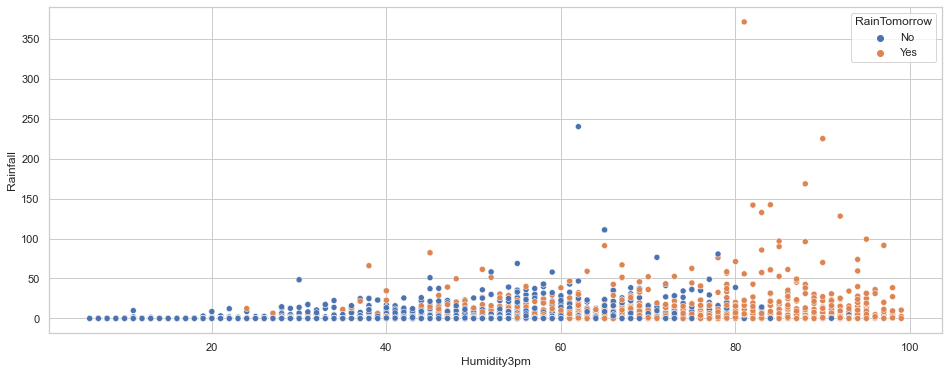

In [24]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Humidity3pm',y='Rainfall',hue='RainTomorrow',data=df)
plt.show()

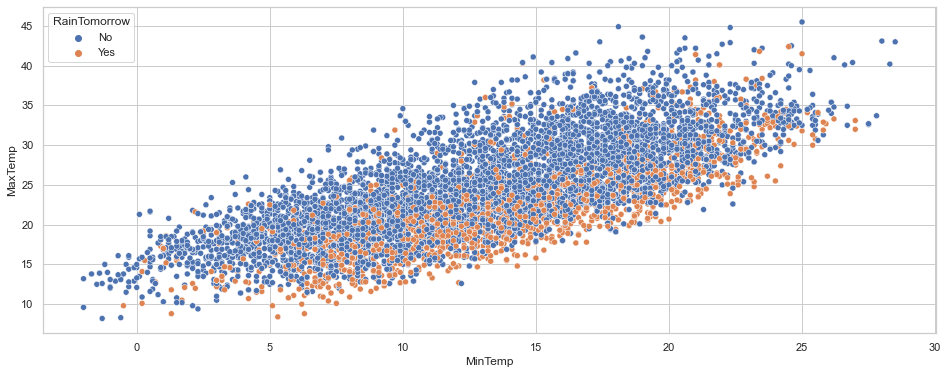

In [25]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='MinTemp',y='MaxTemp',hue='RainTomorrow',data=df)
plt.show()

We can see that the In case of rain prediction Yes the minimum temperature recorded is less.

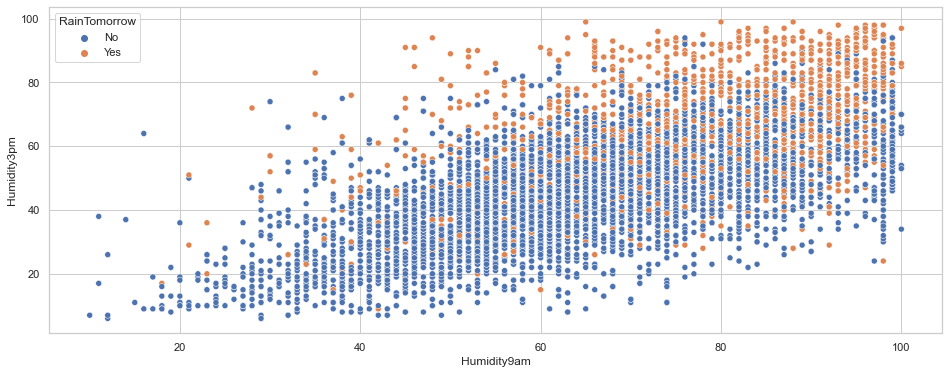

In [26]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Humidity9am',y='Humidity3pm',hue='RainTomorrow',data=df)
plt.show()

From above we can see that if the Humidity of the Location is high then there is more probability for rainfall.

REGRESSION PLOTS

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

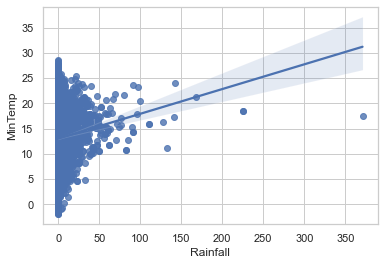

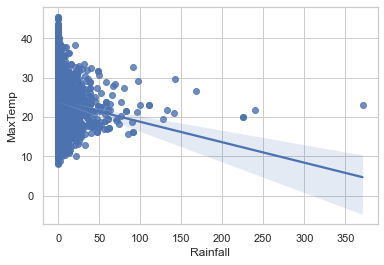

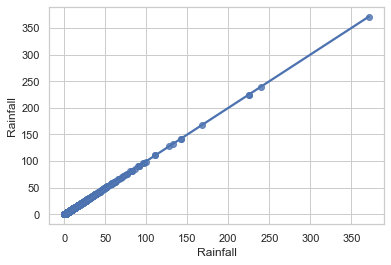

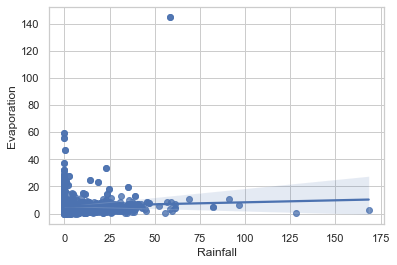

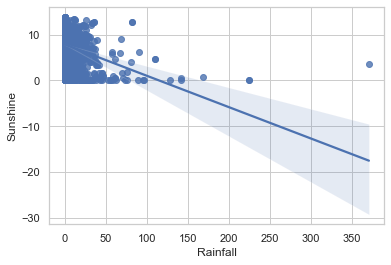

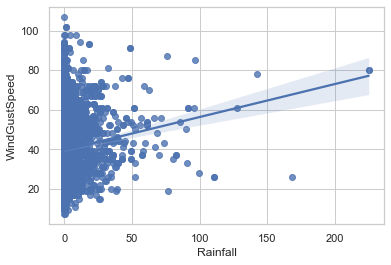

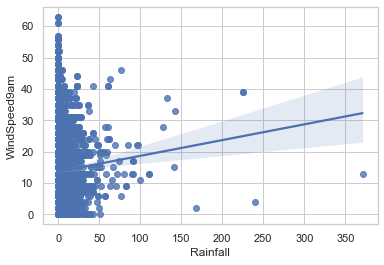

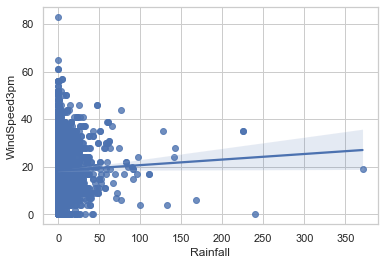

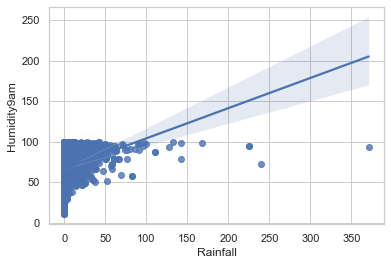

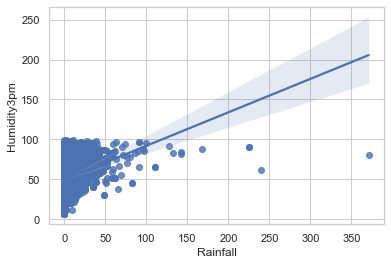

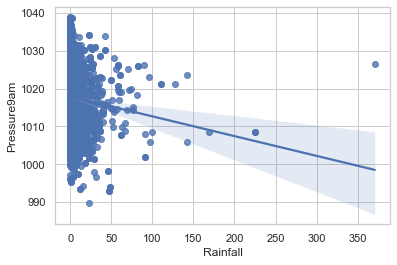

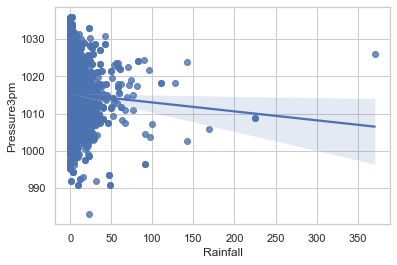

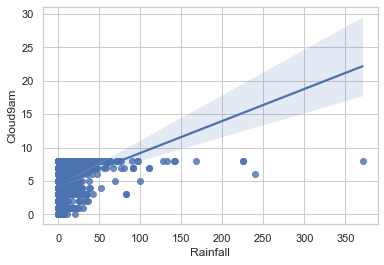

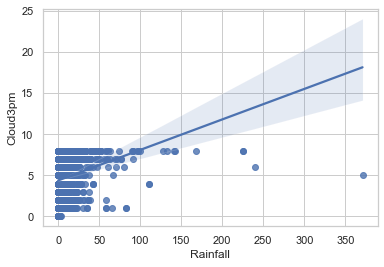

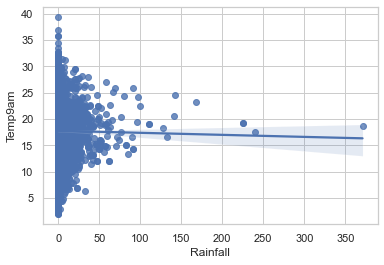

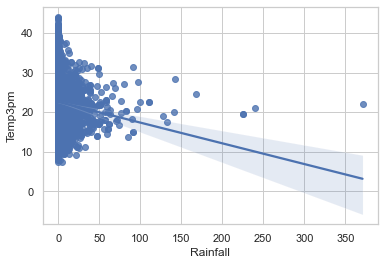

In [28]:
for i in df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]:
    sns.regplot(x='Rainfall',y=i,data=df)
    plt.show()

From above we can see that the columns which show correlation with the Target(Rainfall):-
   1. +ve correlation : -  MinTemp, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Cloud9am & Cloud3pm.
   2. -ve correlation : - MaxTemp, Sunshine, Pressure9am, Pressure3pm & Temp3pm.

# Treating Null Values

In [29]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Year                0
Month               0
Day                 0
dtype: int64

Replacing Null Values of Categorical Columns with Mode of the respective columns.

In [30]:
for i in ['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow']:
    df[i].fillna(df[i].mode()[0], inplace=True)

Replacing Null Values of Continuous(Numerical) Columns with Mean of the respective columns.

In [31]:
for i in ['MinTemp', 'MaxTemp', 'Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']:
    df[i]=df[i].fillna(np.mean(df[i]))

In [32]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

We can see that now the Null Values have been removed.

# Label Encoding

Converting the Columns with String values into integer values to use these features for M.L. model.

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Location']=le.fit_transform(df['Location'])
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])
df['RainToday']=le.fit_transform(df['RainToday'])
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


# CORRELATION

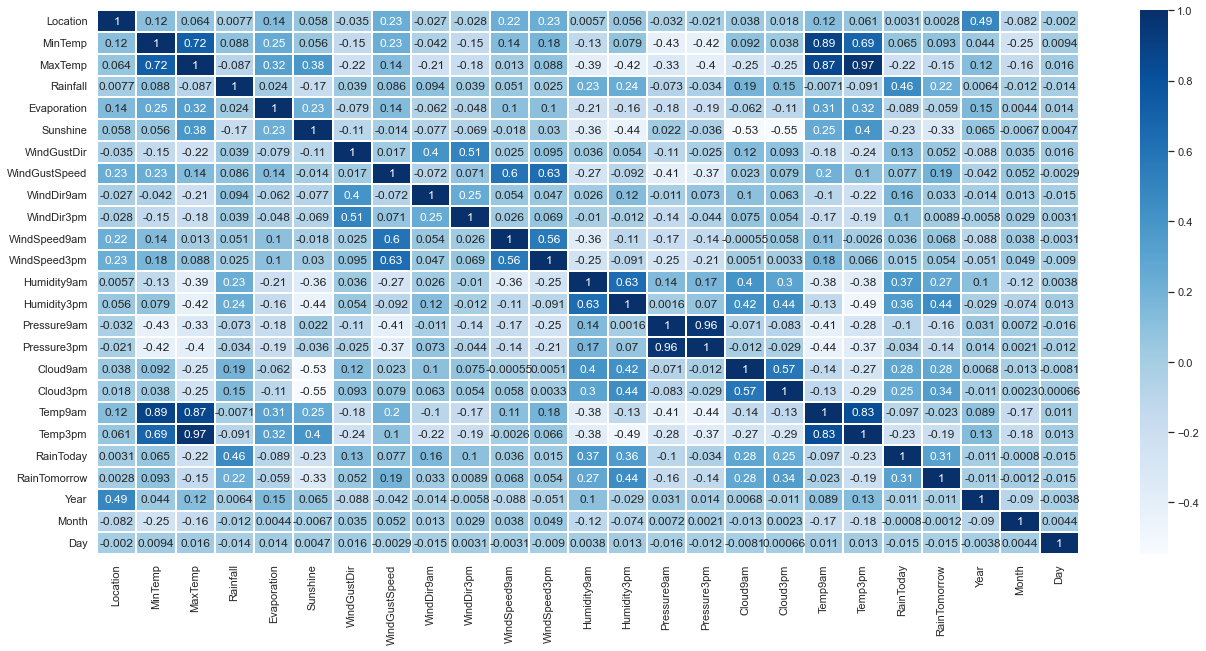

In [34]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,linewidths = 2,cmap="Blues")
plt.show()

From above we can see that some column have High Correlation(>=0.70) b/w them. These columns are: - 
   1. MinTemp & Temp3pm
   2. MinTemp & Temp9am
   3. MinTemp & MaxTemp
   4. MaxTemp & Temp3pm
   5. MaxTemp & Temp9am
   6. Pressure9am & Pressure3pm

CORRELATION with the Rainfall Column

In [35]:
df.corr()['Rainfall'].sort_values()

Sunshine        -0.169432
Temp3pm         -0.090687
MaxTemp         -0.087451
Pressure9am     -0.072668
Pressure3pm     -0.033649
Day             -0.013760
Month           -0.012244
Temp9am         -0.007083
Year             0.006435
Location         0.007693
Evaporation      0.023517
WindSpeed3pm     0.024791
WindDir3pm       0.038560
WindGustDir      0.038812
WindSpeed9am     0.050631
WindGustSpeed    0.086000
MinTemp          0.087684
WindDir9am       0.093821
Cloud3pm         0.150760
Cloud9am         0.185444
RainTomorrow     0.220021
Humidity9am      0.228800
Humidity3pm      0.235444
RainToday        0.461106
Rainfall         1.000000
Name: Rainfall, dtype: float64

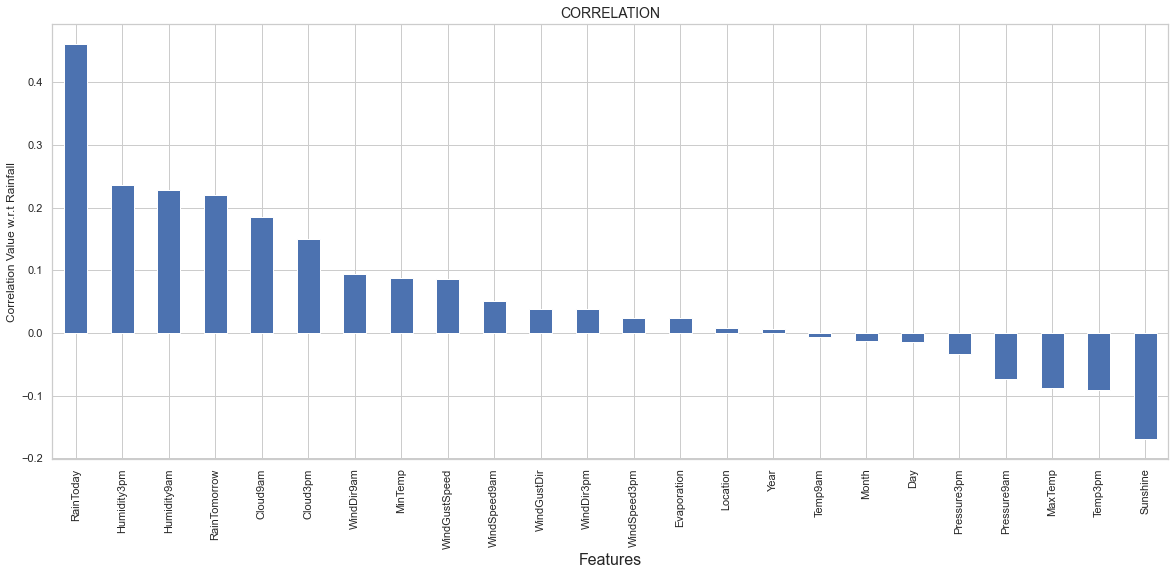

In [36]:
plt.figure(figsize=(20,8))
df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Correlation Value w.r.t Rainfall",fontsize=12)
plt.title("CORRELATION",fontsize=14)
plt.show()

We can see that RainToday is showing highest +ve correlation with the Rainfall while Sunshine shows highest -ve correlation with Rainfall.

Also, Sunshine, Temp3pm, MaxTemp, Pressure3pm, Day, Month & Temp9am show -ve correlation with Rainfall Column. Rest all columns have +ve correltion with Rainfall.

CORRELATION with the RainTomorrow Column

In [37]:
df.corr()['RainTomorrow'].sort_values()

Sunshine        -0.327731
Temp3pm         -0.193805
Pressure9am     -0.163985
MaxTemp         -0.152886
Pressure3pm     -0.135242
Evaporation     -0.059012
Temp9am         -0.023211
Day             -0.015461
Year            -0.011066
Month           -0.001243
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.051832
WindSpeed3pm     0.053568
WindSpeed9am     0.068285
MinTemp          0.092942
WindGustSpeed    0.190127
Rainfall         0.220021
Humidity9am      0.271222
Cloud9am         0.278943
RainToday        0.312929
Cloud3pm         0.344369
Humidity3pm      0.444808
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

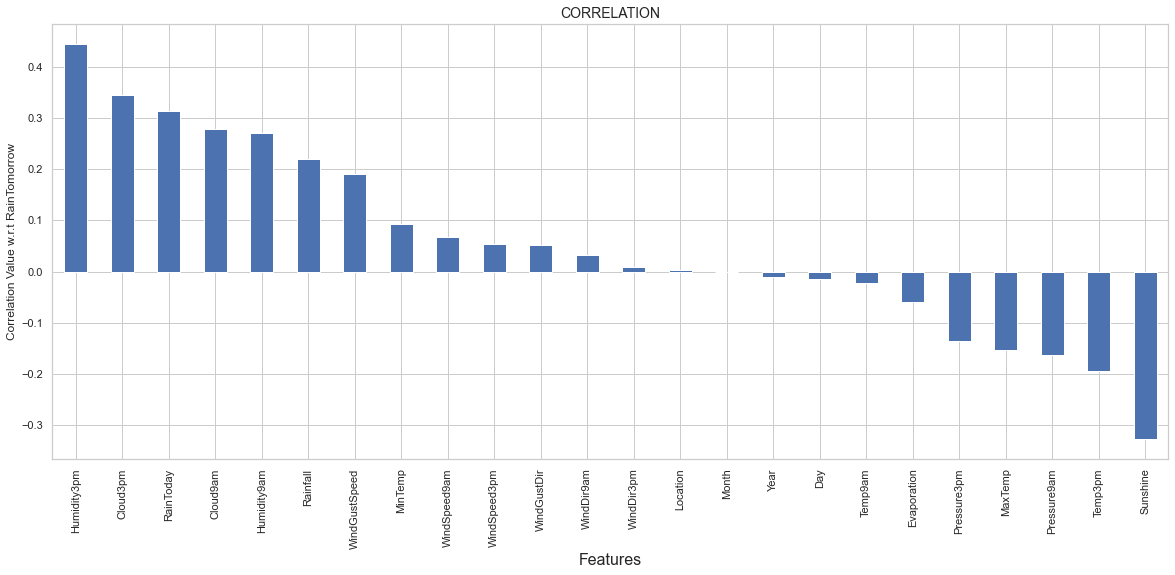

In [38]:
plt.figure(figsize=(20,8))
df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Correlation Value w.r.t RainTomorrow",fontsize=12)
plt.title("CORRELATION",fontsize=14)
plt.show()

We can see that Humidity3pm has highest +ve correlation with RainTomorrow, while Sunshine has highest -ve correlation with RainTomorrow.

Also, Sunshine, Temp3pm, Pressure9am, MaxTemp, Pressure3pm, Evaporation, Temp9am, Day, Year & Month show -ve correlation with RainTomorrow Column. Rest all columns have +ve correltion with RainTomorrow.

# Task 1. Predicting the Rainfall(mm)

# Data Preparation

# Treating Outliers

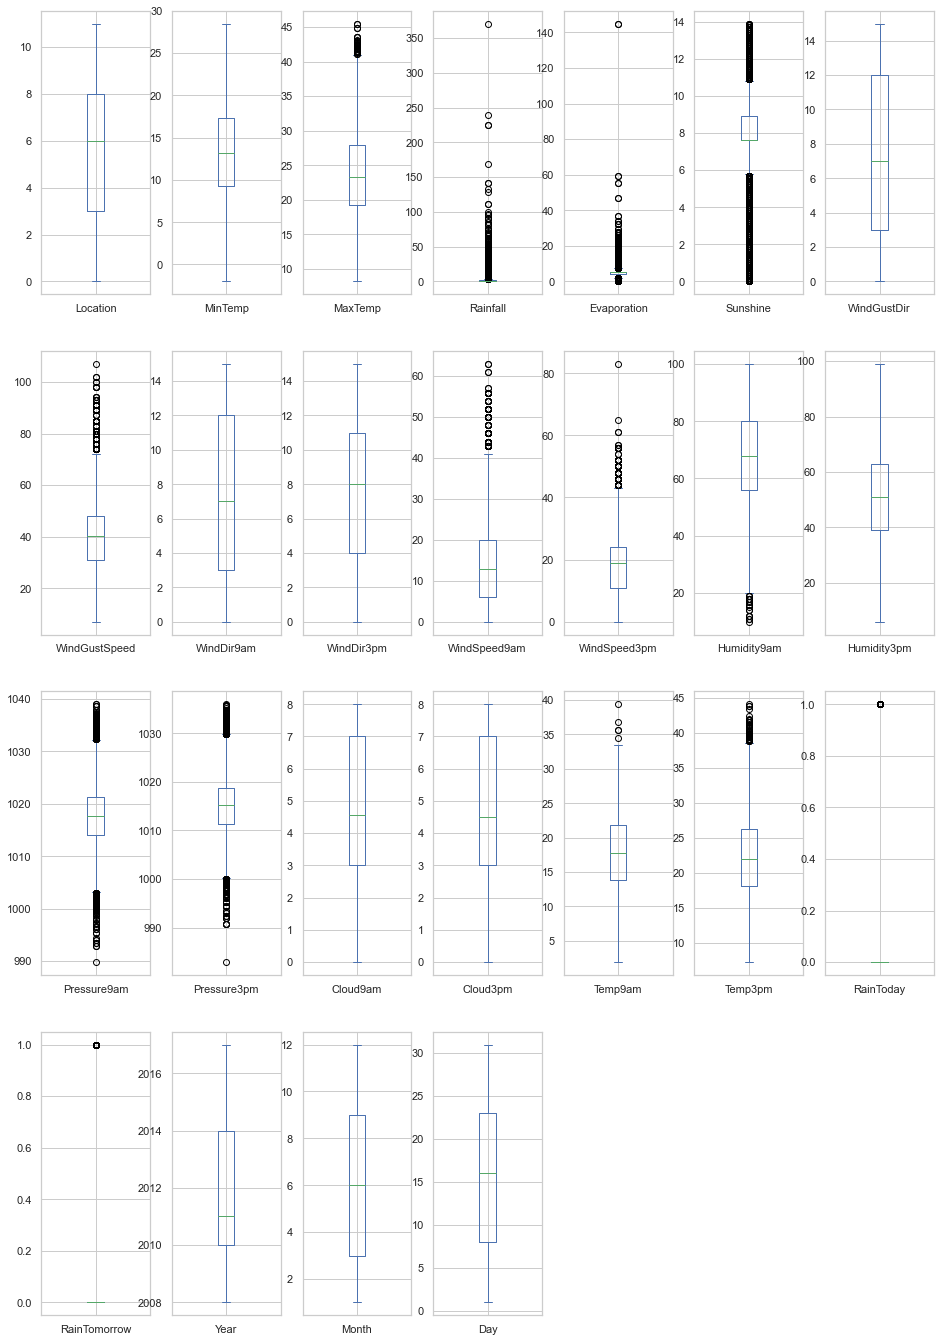

In [39]:
df.plot(kind='box',subplots=True,layout=(4,7),figsize=(16,24)) 
plt.show()

We can see that ouliers are present in many continuous columns. We will remove these outliers using Z-Score.

Removing Outliers using Z-score

In [77]:
from scipy.stats import zscore               # Removing Outliers from independent columns with continuous(numerical) values
z=np.abs(zscore(df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]))
z

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.038425,1.570089e-01,0.213986,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138
1,1.076989,2.028121e-01,0.272189,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348
2,0.054526,3.009450e-01,0.272189,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334
3,0.742365,6.771214e-01,0.272189,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376
4,0.800625,1.380408e+00,0.175183,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.932140,7.523137e-02,0.272189,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.488181,1.109058,0.814518,0.000000,3.862851e-16,1.366273,0.007221
8421,1.783418,2.355231e-01,0.272189,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,1.652018,0.933770,0.621501,0.000000,3.862851e-16,1.223619,0.345987
8422,1.448794,4.972110e-01,0.272189,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,1.488181,0.535388,0.251553,0.000000,3.862851e-16,0.938310,0.615099
8423,1.002628,5.135665e-01,0.272189,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,1.488181,0.280424,0.203299,0.644950,1.088680e+00,0.474684,0.598279


In [132]:
# Now to take out the ouliers taking threshold 3
# All values with Z-score >3 will be considered as ouliers
# Making a new file for values with z-score<3

threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,2017,6,21
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,2017,6,22
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,2017,6,23
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,2017,6,24


# Treating Skewness

In [133]:
df_new.skew().sort_values(ascending=False)

Rainfall         3.488446
RainToday        1.301170
RainTomorrow     1.296077
Evaporation      0.846181
WindSpeed9am     0.711395
WindGustSpeed    0.506897
Year             0.430100
Temp3pm          0.334170
MaxTemp          0.314510
WindSpeed3pm     0.300109
WindDir9am       0.160081
Humidity3pm      0.125150
WindGustDir      0.112339
Month            0.054460
Pressure3pm      0.044876
Pressure9am      0.020735
Day              0.002731
Temp9am         -0.038035
Location        -0.040284
MinTemp         -0.084549
WindDir3pm      -0.126255
Humidity9am     -0.231656
Cloud3pm        -0.266829
Cloud9am        -0.356892
Sunshine        -0.723970
dtype: float64

Taking Skewness threshold +/- 0.5. We can see that the following columns are having skewnees which needs to be removed:-
   1.  +ve Skewed columns - Rainfall, Evaporation, WindSpeed9am, WindGustSpeed
   2.  -ve Skewed columns - Sunshine

Using Power Transformation for removing skewnees from the data.

In [134]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)

In [135]:
a = df_new.loc[:,['Rainfall','Evaporation','WindSpeed9am','WindGustSpeed','Sunshine',]]    
a.head()       

,Rainfall,Evaporation,WindSpeed9am,WindGustSpeed,Sunshine
0,0.6,5.389395,20.0,44.0,7.632205
1,0.0,5.389395,4.0,44.0,7.632205
2,0.0,5.389395,19.0,46.0,7.632205
3,0.0,5.389395,11.0,24.0,7.632205
4,1.0,5.389395,7.0,41.0,7.632205


In [136]:
a.skew()

Rainfall         3.488446
Evaporation      0.846181
WindSpeed9am     0.711395
WindGustSpeed    0.506897
Sunshine        -0.723970
dtype: float64

In [137]:
data = pt.fit_transform(a)
a_new = pd.DataFrame(data,columns=a.columns,index=a.index)
a_new.skew()

Rainfall         0.913570
Evaporation      0.074744
WindSpeed9am    -0.111481
WindGustSpeed    0.003128
Sunshine        -0.066262
dtype: float64

Now we can see that the Skewnees is removed. Saving this transformed data to the original DataFrame.

In [138]:
df_new['Evaporation']=a_new['Evaporation']
df_new['WindSpeed9am']=a_new['WindSpeed9am']
df_new['WindGustSpeed']=a_new['WindGustSpeed']
df_new['Sunshine']=a_new['Sunshine']
df_new['Rainfall']=a_new['Rainfall']
df_new.skew().sort_values(ascending=False)

RainToday        1.301170
RainTomorrow     1.296077
Rainfall         0.913570
Year             0.430100
Temp3pm          0.334170
MaxTemp          0.314510
WindSpeed3pm     0.300109
WindDir9am       0.160081
Humidity3pm      0.125150
WindGustDir      0.112339
Evaporation      0.074744
Month            0.054460
Pressure3pm      0.044876
Pressure9am      0.020735
WindGustSpeed    0.003128
Day              0.002731
Temp9am         -0.038035
Location        -0.040284
Sunshine        -0.066262
MinTemp         -0.084549
WindSpeed9am    -0.111481
WindDir3pm      -0.126255
Humidity9am     -0.231656
Cloud3pm        -0.266829
Cloud9am        -0.356892
dtype: float64

# Treating Multicollinearity

Checking Variance Inflation Factor(VIF)

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [141]:
calc_vif(df_new)

,Variables,VIF FACTOR
0,Location,5.112391
1,MinTemp,60.418448
2,MaxTemp,439.754948
3,Rainfall,4.822572
4,Evaporation,1.564607
5,Sunshine,2.066804
6,WindGustDir,5.379972
7,WindGustSpeed,2.330106
8,WindDir9am,4.763229
9,WindDir3pm,6.140500


We can see that Pressure9am & Pressure3pm have the maximum V.I.F Close to each other. We will drop Pressure3pm column as it shows less correlation with the target Rainfall.

In [142]:
df_new.drop({'Pressure3pm'},axis=1,inplace=True)          
calc_vif(df_new)

,Variables,VIF FACTOR
0,Location,5.112324
1,MinTemp,59.646485
2,MaxTemp,439.752225
3,Rainfall,4.800706
4,Evaporation,1.552255
5,Sunshine,2.061020
6,WindGustDir,5.357374
7,WindGustSpeed,2.328234
8,WindDir9am,4.690359
9,WindDir3pm,5.946973


Now Pressure9am & Year have the maximum V.I.F Close to each other. We will drop Year column as it shows less correlation with the target Rainfall.

In [143]:
df_new.drop({'Year'},axis=1,inplace=True)          
calc_vif(df_new)

,Variables,VIF FACTOR
0,Location,5.107055
1,MinTemp,59.641934
2,MaxTemp,437.613068
3,Rainfall,4.779862
4,Evaporation,1.524572
5,Sunshine,2.051914
6,WindGustDir,5.316825
7,WindGustSpeed,2.212094
8,WindDir9am,4.688693
9,WindDir3pm,5.842181


Now MaxTemp & Temp3pm have maximum V.I.F. close to each other. We will drop Temp3pm column.

In [144]:
df_new.drop({'Temp3pm'},axis=1,inplace=True)          
calc_vif(df_new)

,Variables,VIF FACTOR
0,Location,5.100968
1,MinTemp,59.507680
2,MaxTemp,152.801265
3,Rainfall,4.779524
4,Evaporation,1.524510
5,Sunshine,2.051775
6,WindGustDir,5.296089
7,WindGustSpeed,2.197532
8,WindDir9am,4.678709
9,WindDir3pm,5.820728


Now MaxTemp & Temp9am have maximum V.I.F. close to each other. We will drop Temp9am column.

In [145]:
df_new.drop({'Temp9am'},axis=1,inplace=True)          
calc_vif(df_new)

,Variables,VIF FACTOR
0,Location,5.027382
1,MinTemp,31.550440
2,MaxTemp,87.836849
3,Rainfall,4.776109
4,Evaporation,1.520822
5,Sunshine,2.044926
6,WindGustDir,5.292045
7,WindGustSpeed,2.165395
8,WindDir9am,4.676720
9,WindDir3pm,5.820710


We can see that now the V.I.F. Values have been reduced significantly. And most of the values are below 10.

# Data Scaling

As we can see the columns are in different scales. So we will use encoding techniques to scale the data.

In [146]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()

In [147]:
scale=mns.fit_transform(df_new)
df_new=pd.DataFrame(scale,columns=df_new.columns)
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month,Day
0,0.090909,0.508251,0.434911,0.519412,0.445698,0.444575,0.866667,0.625872,0.866667,0.933333,...,0.521739,0.646341,0.172043,0.233244,1.000000,0.562898,0.0,0.0,1.000000,0.000000
1,0.090909,0.310231,0.500000,0.000000,0.445698,0.444575,0.933333,0.625872,0.400000,1.000000,...,0.478261,0.317073,0.204301,0.310992,0.570828,0.562898,0.0,0.0,1.000000,0.033333
2,0.090909,0.491749,0.517751,0.000000,0.445698,0.444575,1.000000,0.649453,0.866667,1.000000,...,0.565217,0.243902,0.258065,0.230563,0.570828,0.250000,0.0,0.0,1.000000,0.066667
3,0.090909,0.369637,0.585799,0.000000,0.445698,0.444575,0.266667,0.351752,0.600000,0.000000,...,0.195652,0.329268,0.107527,0.498660,0.570828,0.562898,0.0,0.0,1.000000,0.100000
4,0.090909,0.643564,0.713018,0.661116,0.445698,0.444575,0.866667,0.589472,0.066667,0.466667,...,0.434783,0.780488,0.290323,0.316354,0.875000,1.000000,0.0,0.0,1.000000,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,0.818182,0.158416,0.449704,0.000000,0.445698,0.444575,0.000000,0.457377,0.600000,0.066667,...,0.239130,0.402439,0.193548,0.686327,0.570828,0.562898,0.0,0.0,0.454545,0.666667
7983,0.818182,0.184818,0.505917,0.000000,0.445698,0.444575,0.400000,0.318859,0.600000,0.200000,...,0.195652,0.463415,0.161290,0.656836,0.570828,0.562898,0.0,0.0,0.454545,0.700000
7984,0.818182,0.244224,0.553254,0.000000,0.445698,0.444575,0.200000,0.538803,0.600000,0.933333,...,0.195652,0.426829,0.193548,0.589812,0.570828,0.562898,0.0,0.0,0.454545,0.733333
7985,0.818182,0.323432,0.556213,0.000000,0.445698,0.444575,0.600000,0.413724,0.666667,0.200000,...,0.152174,0.402439,0.193548,0.546917,0.375000,0.250000,0.0,0.0,0.454545,0.766667


Now we can see that all the columns are in same scale.

# Splitting the Data

Splitting data into Target & Independent columns

In [148]:
x=df_new.drop({'Rainfall'},axis=1)         # Independent Columns

y=pd.DataFrame(df_new.iloc[:,3])         # Target Column

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

Finding out best random state

In [151]:
for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=0.22)
    lm.fit(x_train,y_train)
    pred_train = lm.predict(x_train)
    pred_test = lm.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"the Model performs very well")
        print(f"For {i},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
        print(f"For {i},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
        print(f"For {i},the Mean squared error is :- {mean_squared_error(y_test,pred_test)}")
        print("\n")

At random state 36 the Model performs very well
For 36,the training accuracy is :- 79.09903807830317
For 36,the testing accuracy is :- 79.07769994850857
For 36,the Mean squared error is :- 0.031931709097439455


At random state 40 the Model performs very well
For 40,the training accuracy is :- 79.08837488766689
For 40,the testing accuracy is :- 79.13367286319352
For 40,the Mean squared error is :- 0.031999453881162106


At random state 72 the Model performs very well
For 72,the training accuracy is :- 79.09523087325726
For 72,the testing accuracy is :- 79.11360155537811
For 72,the Mean squared error is :- 0.033148443085878915


At random state 73 the Model performs very well
For 73,the training accuracy is :- 79.0841409719867
For 73,the testing accuracy is :- 79.1497807358021
For 73,the Mean squared error is :- 0.033000524350628835


At random state 88 the Model performs very well
For 88,the training accuracy is :- 79.0852426674275
For 88,the testing accuracy is :- 79.13712812867979
Fo

From above we can see that Model is performing best at Random State = 36. Beacuse for random state=36 Model's testing accuracy is equal to Training accuracy. And Model is getting least mean squared error.

Therefore, using Random State = 36 for further working & Splitting the DataFrame.

In [152]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=36,test_size=0.22)

In [153]:
x_train.shape

(6229, 20)

In [154]:
y_train.shape

(6229, 1)

In [155]:
x_test.shape

(1758, 20)

In [156]:
y_test.shape

(1758, 1)

# Testing with Different Models

In [157]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [158]:
lm = LinearRegression()
svr = SVR(kernel='rbf')
dtc = DecisionTreeRegressor()
ls  = Lasso(alpha=0.0001)
rd = Ridge(alpha=0.0001)

models = [lm,svr,dtc,ls,rd]

for i in models:
    i.fit(x_train,y_train)
    pred_train = i.predict(x_train)
    pred_test = i.predict(x_test)
    print(f"For {i},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
    print(f"For {i},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
    print(f"For {i},the Mean squared error is :- {mean_squared_error(y_test,pred_test)}")
    print("\n")

For LinearRegression(),the training accuracy is :- 79.09903807830317
For LinearRegression(),the testing accuracy is :- 79.07769994850857
For LinearRegression(),the Mean squared error is :- 0.031931709097439455


For SVR(),the training accuracy is :- 86.714450439128
For SVR(),the testing accuracy is :- 82.87775507024853
For SVR(),the Mean squared error is :- 0.026132047759871282


For DecisionTreeRegressor(),the training accuracy is :- 100.0
For DecisionTreeRegressor(),the testing accuracy is :- 76.36964356296872
For DecisionTreeRegressor(),the Mean squared error is :- 0.036064757018065066


For Lasso(alpha=0.0001),the training accuracy is :- 79.09195018707712
For Lasso(alpha=0.0001),the testing accuracy is :- 79.10486627590248
For Lasso(alpha=0.0001),the Mean squared error is :- 0.03189024772553226


For Ridge(alpha=0.0001),the training accuracy is :- 79.09903807829618
For Ridge(alpha=0.0001),the testing accuracy is :- 79.07770097454922
For Ridge(alpha=0.0001),the Mean squared error is

From above algorithms we can see that except DecisionTreeRegressor() all other algoritms are performing well with the the data.

Also, SVR() is getting highest accuracy among all models.

# Ensemble Techniques

Using various Bagging & Boosting Ensemble Algorithms to increase the model performance.

In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [160]:
rf = RandomForestRegressor(n_estimators=100)
br = BaggingRegressor(n_estimators=100)
ad = AdaBoostRegressor(n_estimators=100)
gb = GradientBoostingRegressor(n_estimators=100)
et = ExtraTreesRegressor()

models = [rf,br,ad,gb,et]

for i in models:
    i.fit(x_train,y_train)
    pred_train = i.predict(x_train)
    pred_test = i.predict(x_test)
    print(f"For {i},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
    print(f"For {i},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
    print(f"For {i},the Mean squared error is :- {mean_squared_error(y_test,pred_test)}")
    print("\n")

For RandomForestRegressor(),the training accuracy is :- 98.40743049823729
For RandomForestRegressor(),the testing accuracy is :- 88.41913205066994
For RandomForestRegressor(),the Mean squared error is :- 0.0176747731149906


For BaggingRegressor(n_estimators=100),the training accuracy is :- 98.41434532959865
For BaggingRegressor(n_estimators=100),the testing accuracy is :- 88.6724755874203
For BaggingRegressor(n_estimators=100),the Mean squared error is :- 0.017288119061788083


For AdaBoostRegressor(n_estimators=100),the training accuracy is :- 74.4140672366363
For AdaBoostRegressor(n_estimators=100),the testing accuracy is :- 74.12515294443868
For AdaBoostRegressor(n_estimators=100),the Mean squared error is :- 0.03949030876555202


For GradientBoostingRegressor(),the training accuracy is :- 84.23396709598411
For GradientBoostingRegressor(),the testing accuracy is :- 82.50760910710899
For GradientBoostingRegressor(),the Mean squared error is :- 0.026696966205236972


For ExtraTreesRe

From above ensemble methods we can see that apart from ExtraTreesRegressor() & AdaBoostRegressor(n_estimators=100) all other algoritms are performing well with the data.

Also, RandomForestRegressor() is getting the highest accuracy among all.

# Gradient Descent Algorithm

In [161]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

In [162]:
sgd.fit(x_train,y_train)
pred_train = sgd.predict(x_train)
pred_test = sgd.predict(x_test)
print("For",sgd,"the training accuracy is :-", r2_score(y_train,pred_train)*100)
print("For",sgd,"testing accuracy is :-", r2_score(y_test,pred_test)*100)
print("For",sgd,"the Mean squared error is :-", mean_squared_error(y_test,pred_test))

For SGDRegressor() the training accuracy is :- 78.80334176601616
For SGDRegressor() testing accuracy is :- 79.03715818535899
For SGDRegressor() the Mean squared error is :- 0.03199358411997537


We can see that SGDRegressor() is not performing that well with the model as compared to other algorithms.

# Cross-Validation of all Algorithms

Checking cross_val_scores for all the Algorithms that are performing well to know the which Algorithm is actually working best for the the Model.

In [163]:
from sklearn.model_selection import cross_val_score
model = [lm,svr,ls,rd,rf,br,gb]

for m in model:
    pred_test = m.predict(x_test)
    score = cross_val_score(m,x,y,cv=5)
    c_score = score.mean()
    print("For",m)
    print("Cross Validation score is:-",c_score*100)
    print(f"The testing accuracy is :- {r2_score(y_test,pred_test)*100}")
    print("\n")

For LinearRegression()
Cross Validation score is:- 78.62549910683985
The testing accuracy is :- 79.07769994850857


For SVR()
Cross Validation score is:- 78.6183963582346
The testing accuracy is :- 82.87775507024853


For Lasso(alpha=0.0001)
Cross Validation score is:- 78.61814849229805
The testing accuracy is :- 79.10486627590248


For Ridge(alpha=0.0001)
Cross Validation score is:- 78.62549976064955
The testing accuracy is :- 79.07770097454922


For RandomForestRegressor()
Cross Validation score is:- 82.66276255634584
The testing accuracy is :- 88.41913205066994


For BaggingRegressor(n_estimators=100)
Cross Validation score is:- 82.54002884661021
The testing accuracy is :- 88.6724755874203


For GradientBoostingRegressor()
Cross Validation score is:- 79.84958511106723
The testing accuracy is :- 82.50760910710899




Now from above we can confirm that RandomForestRegressor() is working Best for the data beacuse:-
   1. Cross Val-Score is highest is case of RandomForestRegressor().
   2. Mean squared error is minimum in case of RandomForestRegressor().
   3. Cross Val-Score is very close to Accuracy Score in RandomForestRegressor() among all the algorithms.
   
So, Using RandomForestRegressor() as the Final Algorithm & Optimizaztion.

# Hyperparameter tuning

In [72]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

In [73]:
grid_param = {'n_estimators':[50,100,200,300],'criterion':['squared_error', 'absolute_error', 'poisson'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[6,7,8,9]}

gd_sr = GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'squared_error', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 50}


In [74]:
gd_sr.best_estimator_

RandomForestRegressor(max_depth=6, max_features='auto', n_estimators=50)

Using these above parameters for Final training of the Model.

In [164]:
rf = RandomForestRegressor(max_depth=6, max_features='auto', n_estimators=50)

In [166]:
rf.fit(x_train,y_train)
pred_train = rf.predict(x_train)
pred_test = rf.predict(x_test)
print(f"For {rf},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
print(f"For {rf},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
print(f"For {rf},the Mean squared error is :- {mean_squared_error(y_test,pred_test)}")

For RandomForestRegressor(max_depth=6, max_features='auto', n_estimators=50),the training accuracy is :- 83.52002645401546
For RandomForestRegressor(max_depth=6, max_features='auto', n_estimators=50),the testing accuracy is :- 82.08562892985998
For RandomForestRegressor(max_depth=6, max_features='auto', n_estimators=50),the Mean squared error is :- 0.027340994262938064


# Cross-Validation of Best Model

In [167]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score = cross_val_score(rf,x,y,cv=i)
    c_score = score.mean()
    print("At cv:-",i)
    print("Cross Validation score is:-",c_score*100)
    print("Accuracy Score of model is :-",r2_score(y_test,pred_test)*100)
    print("\n")

At cv:- 2
Cross Validation score is:- 78.2637350419641
Accuracy Score of model is :- 82.08562892985998


At cv:- 3
Cross Validation score is:- 78.98416799538751
Accuracy Score of model is :- 82.08562892985998


At cv:- 4
Cross Validation score is:- 78.30627361066227
Accuracy Score of model is :- 82.08562892985998


At cv:- 5
Cross Validation score is:- 79.07849096964534
Accuracy Score of model is :- 82.08562892985998


At cv:- 6
Cross Validation score is:- 79.75111203552915
Accuracy Score of model is :- 82.08562892985998


At cv:- 7
Cross Validation score is:- 79.25749604662427
Accuracy Score of model is :- 82.08562892985998


At cv:- 8
Cross Validation score is:- 80.04209327532128
Accuracy Score of model is :- 82.08562892985998


At cv:- 9
Cross Validation score is:- 80.42458962407773
Accuracy Score of model is :- 82.08562892985998




Accuracy score is closest to Cross Val Score at cv = 9. Using cv=9 for final validation.

In [170]:
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
score = cross_val_score(rf,x,y,cv=9)
c_score = score.mean()
print("For",rf,"Cross Validation score is:-",round(c_score*100))
print('Accuracy Score of',rf,'is:',round(r2_score(y_test,pred_test)*100))

For RandomForestRegressor(max_depth=6, max_features='auto', n_estimators=50) Cross Validation score is:- 80
Accuracy Score of RandomForestRegressor(max_depth=6, max_features='auto', n_estimators=50) is: 82


We can see that the accuraccy score & Cross-val score is almost equal. Hence there is no problem of overfitting & underfitting

# Saving the best Model

In [171]:
import pickle

filename = 'Rainfall Prediction.pkl'

pickle.dump(rf, open(filename,'wb')) 

# Conclusion

In [172]:
loaded_model = pickle.load(open('Rainfall Prediction.pkl','rb'))
result = loaded_model.score(x_train,y_train)
print(result)

0.8310898061847323


# Task 2. Predicting the Rain Tommorow

# Data Preparation

Splitting data into Target & Independent columns

In [174]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [196]:
x=df.drop({'RainTomorrow'},axis=1)         # Independent Columns

y=df.iloc[:,-4]         # Target Column

# Data Balancing

In [197]:
y.value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

As we can see that the data is Imbalance. So, using SMOTE to balance the data.

In [198]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
dx,dy=sm.fit_resample(x,y)
dy

0        0
1        0
2        0
3        0
4        0
        ..
12863    1
12864    1
12865    1
12866    1
12867    1
Name: RainTomorrow, Length: 12868, dtype: int32

In [199]:
dy.value_counts()

0    6434
1    6434
Name: RainTomorrow, dtype: int64

Now we can see that the Data is Balanced.

In [200]:
dy = pd.DataFrame(dy)
dy

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
12863,1
12864,1
12865,1
12866,1


In [201]:
dx.shape

(12868, 24)

# Treating Outliers

Removing Outliers using Z-score

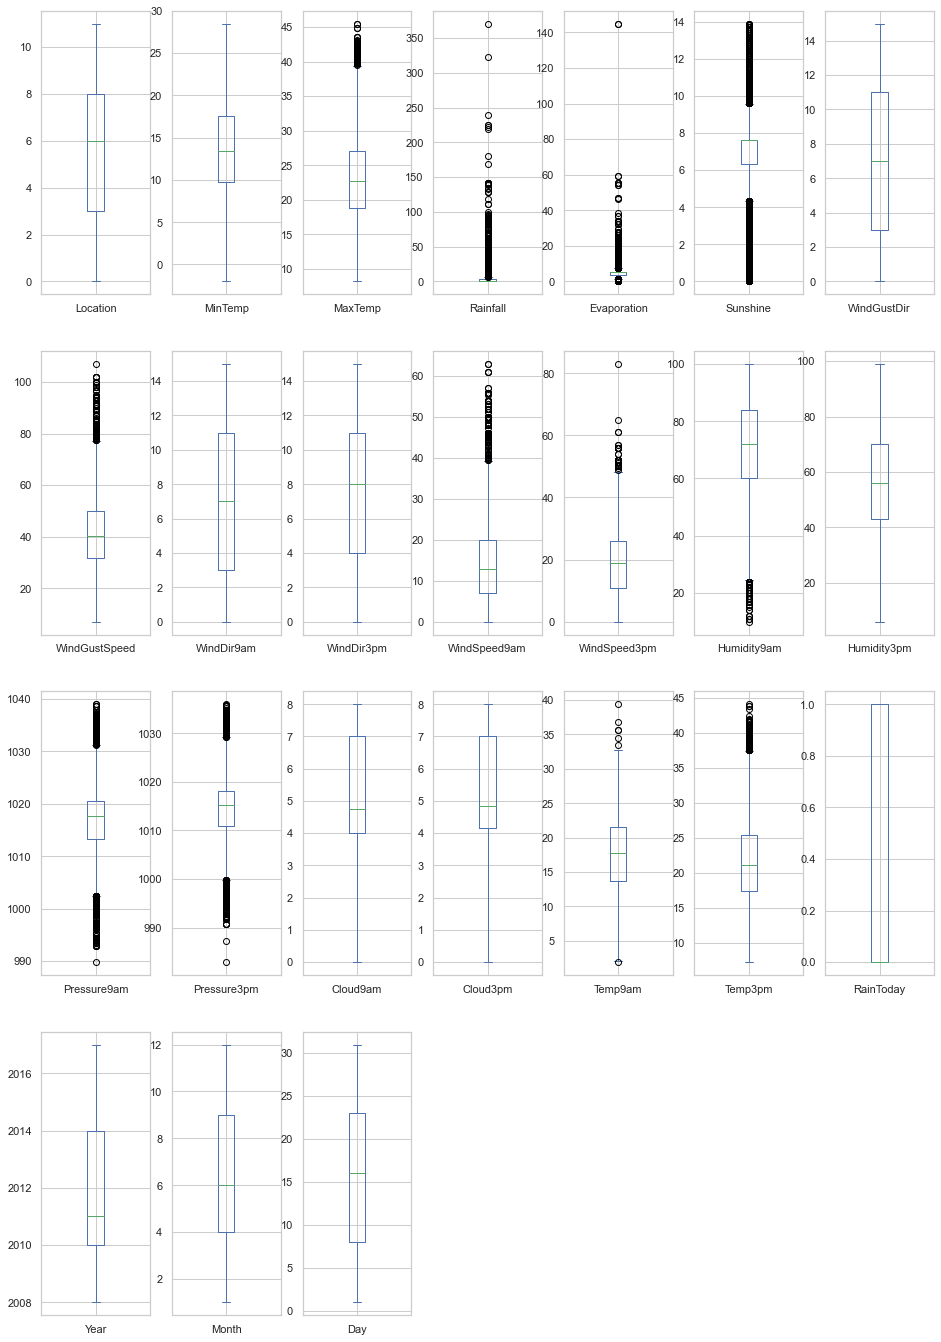

In [203]:
dx.plot(kind='box',subplots=True,layout=(4,7),figsize=(16,24)) 
plt.show()

We can see that ouliers are present in many continuous columns. We will remove these outliers using Z-Score.

In [205]:
from scipy.stats import zscore               # Removing Outliers from independent columns with continuous(numerical) values
z=np.abs(zscore(dx[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]))
z

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.013532,0.055592,0.285105,0.048110,0.195471,0.161613,0.575407,0.533769,0.022500,1.784072,1.495265,1.237688,1.301781,0.222796,0.135220,0.018861
1,1.166552,0.312934,0.334739,0.048110,0.195471,0.161613,1.013886,0.329597,1.604755,1.627697,1.030766,1.124637,0.177876,0.222796,0.080037,0.446782
2,0.109617,0.413442,0.334739,0.048110,0.195471,0.302769,0.476076,0.737942,1.966367,1.367073,1.511282,0.979285,0.177876,1.357396,0.618956,0.258497
3,0.820646,0.798719,0.334739,0.048110,0.195471,1.249943,0.318570,0.997525,1.544486,2.096821,0.090436,0.317130,0.177876,0.222796,0.085514,0.823353
4,0.774365,1.519020,0.252016,0.048110,0.195471,0.050121,0.715894,0.125424,0.685456,1.210698,0.998732,1.415339,0.870819,1.362183,0.030331,1.371093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,0.948311,1.395424,0.334739,0.280485,0.107976,0.198815,0.826426,0.798087,0.608688,0.276273,1.169917,1.408676,0.004095,0.908920,0.974665,1.299930
12864,0.989253,0.432227,0.332232,0.052572,0.056206,0.625438,0.554861,1.265111,0.351242,1.090693,1.426092,1.390129,0.098421,1.570267,1.005805,0.227639
12865,0.820646,1.613452,0.525585,0.048110,0.195471,0.967632,0.078753,0.385007,1.468949,1.968917,1.868343,1.943888,1.301781,1.362183,1.128526,1.487422
12866,0.514770,0.131628,0.240051,0.261441,0.806229,1.405395,1.804840,2.304560,0.611259,0.292110,0.511677,0.539879,0.733733,0.544974,0.639897,0.224915


In [206]:
# Now to take out the ouliers taking threshold 3
# All values with Z-score >3 will be considered as ouliers
# Making a new file for values with z-score<3

threshold=3
dx=dx[(z<3).all(axis=1)]
dx

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,1,13.400000,22.900000,0.600000,5.389395,7.632205,13,44.000000,13,14,...,1007.700000,1007.100000,8.000000,4.503183,16.900000,21.800000,0,2008,12,1
1,1,7.400000,25.100000,0.000000,5.389395,7.632205,14,44.000000,6,15,...,1010.600000,1007.800000,4.566622,4.503183,17.200000,24.300000,0,2008,12,2
2,1,12.900000,25.700000,0.000000,5.389395,7.632205,15,46.000000,13,15,...,1007.600000,1008.700000,4.566622,2.000000,21.000000,23.200000,0,2008,12,3
3,1,9.200000,28.000000,0.000000,5.389395,7.632205,4,24.000000,9,0,...,1017.600000,1012.800000,4.566622,4.503183,18.100000,26.500000,0,2008,12,4
4,1,17.500000,32.300000,1.000000,5.389395,7.632205,13,41.000000,1,7,...,1010.800000,1006.000000,7.000000,8.000000,17.800000,29.700000,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,8,8.535663,14.901570,0.000000,4.214202,6.768438,8,44.527103,11,9,...,1024.339514,1023.486019,4.988866,7.000000,12.336448,14.095364,0,2009,7,7
12864,10,18.618216,25.812144,0.030306,5.405352,7.235783,8,32.848469,9,0,...,1008.131864,1006.156099,4.750989,1.530360,23.103063,23.019720,0,2009,2,18
12865,10,9.200000,13.600000,10.400000,5.389395,7.632205,15,28.000000,14,15,...,1028.700000,1026.800000,8.000000,8.000000,11.500000,13.000000,1,2016,8,6
12866,3,16.149138,24.017649,1.144636,4.282312,9.370739,10,61.622845,11,11,...,1013.840828,1011.420762,3.276820,3.792385,21.113841,23.003808,0,2009,3,18


In [207]:
print(np.where(z>3)[0])

[   12    12    44    44    52    59    59    60    60    61    61    62
    62    66    66    67    67    68    68    69    69   123   267   296
   381   381   405   405   406   406   407   407   417   431   462   466
   466   563   567   568   568   569   602   602   603   683   683   699
   713   748   796   797   928   949   979   980   980   980  1008  1009
  1011  1138  1148  1149  1151  1189  1237  1241  1264  1265  1357  1411
  1412  1479  1480  1481  1513  1535  1587  1644  1665  1673  1680  1774
  1898  1903  1945  2016  2028  2043  2074  2116  2186  2201  2219  2219
  2230  2231  2265  2505  2518  2527  2527  2541  2593  2676  2677  2827
  2835  2849  2853  2855  2859  2859  2863  2869  2877  2883  2890  2891
  2897  2898  2900  2905  2911  2919  2925  2933  2939  2947  2950  2953
  2961  2967  2975  2989  3003  3045  3051  3058  3059  3059  3060  3066
  3067  3067  3067  3068  3070  3082  3082  3082  3089  3089  3099  3099
  3101  3141  3150  3157  3164  3167  3172  3172  3

In [208]:
dy= dy.drop(np.where(z>3)[0],axis=0)     # Dropping the rows from same locations from target varibles
dy

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
12863,1
12864,1
12865,1
12866,1


In [209]:
dx.shape

(12143, 24)

# Treating Skewness

In [210]:
dx.skew().sort_values(ascending=False)

Rainfall         3.055410
RainToday        1.024820
Evaporation      0.756961
WindSpeed9am     0.650410
WindGustSpeed    0.507009
Year             0.475303
Temp3pm          0.345425
MaxTemp          0.318760
WindSpeed3pm     0.282490
WindDir9am       0.170543
WindGustDir      0.099230
Month            0.078666
Pressure3pm      0.074495
Pressure9am      0.031469
Day              0.003113
Location        -0.007299
Humidity3pm     -0.012312
Temp9am         -0.019386
MinTemp         -0.097046
WindDir3pm      -0.128162
Humidity9am     -0.364780
Cloud3pm        -0.510746
Cloud9am        -0.556458
Sunshine        -0.638694
dtype: float64

Taking Skewness threshold +/- 0.5. We can see that the following columns are having skewnees which needs to be removed:-
   1. +ve Skewed columns - Rainfall, Evaporation, WindSpeed9am & WindGustSpeed
   2. -ve Skewed columns - Cloud3pm, Cloud9am & Sunshine

In [211]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)

In [212]:
a = dx.loc[:,['Rainfall','Evaporation','WindSpeed9am','WindGustSpeed','Cloud3pm','Cloud9am','Sunshine',]]    
a.head()      

,Rainfall,Evaporation,WindSpeed9am,WindGustSpeed,Cloud3pm,Cloud9am,Sunshine
0,0.6,5.389395,20.0,44.0,4.503183,8.000000,7.632205
1,0.0,5.389395,4.0,44.0,4.503183,4.566622,7.632205
2,0.0,5.389395,19.0,46.0,2.000000,4.566622,7.632205
3,0.0,5.389395,11.0,24.0,4.503183,4.566622,7.632205
4,1.0,5.389395,7.0,41.0,8.000000,7.000000,7.632205


In [213]:
a.skew()

Rainfall         3.055410
Evaporation      0.756961
WindSpeed9am     0.650410
WindGustSpeed    0.507009
Cloud3pm        -0.510746
Cloud9am        -0.556458
Sunshine        -0.638694
dtype: float64

In [214]:
data = pt.fit_transform(a)
a_new = pd.DataFrame(data,columns=a.columns,index=a.index)
a_new.skew()

Rainfall         0.553205
Evaporation      0.071506
WindSpeed9am    -0.114576
WindGustSpeed    0.000969
Cloud3pm        -0.253246
Cloud9am        -0.303884
Sunshine        -0.105143
dtype: float64

Now we can see that the Skewnees is removed. Saving this transformed data to the original DataFrame.

In [216]:
dx['Rainfall']=a_new['Rainfall']
dx['Evaporation']=a_new['Evaporation']
dx['WindSpeed9am']=a_new['WindSpeed9am']
dx['WindGustSpeed']=a_new['WindGustSpeed']
dx['Cloud3pm']=a_new['Cloud3pm']
dx['Cloud9am']=a_new['Cloud9am']
dx['Sunshine']=a_new['Sunshine']
dx.skew().sort_values(ascending=False)

RainToday        1.024820
Rainfall         0.553205
Year             0.475303
Temp3pm          0.345425
MaxTemp          0.318760
WindSpeed3pm     0.282490
WindDir9am       0.170543
WindGustDir      0.099230
Month            0.078666
Pressure3pm      0.074495
Evaporation      0.071506
Pressure9am      0.031469
Day              0.003113
WindGustSpeed    0.000969
Location        -0.007299
Humidity3pm     -0.012312
Temp9am         -0.019386
MinTemp         -0.097046
Sunshine        -0.105143
WindSpeed9am    -0.114576
WindDir3pm      -0.128162
Cloud3pm        -0.253246
Cloud9am        -0.303884
Humidity9am     -0.364780
dtype: float64

# Treating Multicollinearity

Checking Variance Inflation Factor(VIF)

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [218]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [219]:
calc_vif(dx)

,Variables,VIF FACTOR
0,Location,5.181559
1,MinTemp,71.710829
2,MaxTemp,416.549528
3,Rainfall,3.709611
4,Evaporation,1.549012
5,Sunshine,1.994807
6,WindGustDir,5.532246
7,WindGustSpeed,2.213229
8,WindDir9am,5.179450
9,WindDir3pm,6.371388


We can see that Pressure9am & Pressure3pm have the maximum V.I.F Close to each other. We will drop Pressure3pm column as it shows less correlation with the target RainTomorrow.

In [220]:
dx.drop({'Pressure3pm'},axis=1,inplace=True)          
calc_vif(dx)

,Variables,VIF FACTOR
0,Location,5.174883
1,MinTemp,70.784017
2,MaxTemp,416.548718
3,Rainfall,3.691206
4,Evaporation,1.540064
5,Sunshine,1.992423
6,WindGustDir,5.517999
7,WindGustSpeed,2.212210
8,WindDir9am,5.042988
9,WindDir3pm,6.067665


Now Pressure9am & Year have the maximum V.I.F Close to each other. We will drop Year column as it shows less correlation with the target RainTomorrow.

In [221]:
dx.drop({'Year'},axis=1,inplace=True)          
calc_vif(dx)

,Variables,VIF FACTOR
0,Location,5.170100
1,MinTemp,70.782330
2,MaxTemp,415.159687
3,Rainfall,3.676931
4,Evaporation,1.517983
5,Sunshine,1.983656
6,WindGustDir,5.454619
7,WindGustSpeed,2.071559
8,WindDir9am,5.030126
9,WindDir3pm,6.002746


Now MaxTemp & Temp3pm have maximum V.I.F. close to each other. We will drop MaxTemp column as it show less correlation with the target.

In [222]:
dx.drop({'MaxTemp'},axis=1,inplace=True)          
calc_vif(dx)

,Variables,VIF FACTOR
0,Location,5.153503
1,MinTemp,70.720974
2,Rainfall,3.675347
3,Evaporation,1.512399
4,Sunshine,1.983426
5,WindGustDir,5.445313
6,WindGustSpeed,2.035968
7,WindDir9am,5.026630
8,WindDir3pm,5.994703
9,WindSpeed9am,2.050756


Now Temp3pm & Temp9am have maximum V.I.F. close to each other. We will drop Temp9am column as it shows less correlation with the data.

In [223]:
dx.drop({'Temp9am'},axis=1,inplace=True)          
calc_vif(dx)

,Variables,VIF FACTOR
0,Location,5.117845
1,MinTemp,39.914519
2,Rainfall,3.674835
3,Evaporation,1.511328
4,Sunshine,1.977286
5,WindGustDir,5.431417
6,WindGustSpeed,2.028200
7,WindDir9am,5.023447
8,WindDir3pm,5.993600
9,WindSpeed9am,2.022128


We can see that now the V.I.F. Values have been reduced significantly. And most of the values are below 10.

# Data Scaling

As we can see the columns are in different scales. So we will use encoding techniques to scale the data.

In [224]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()

In [225]:
scale=mns.fit_transform(dx)
dx=pd.DataFrame(scale,columns=dx.columns)
dx

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,Month,Day
0,0.090909,0.516779,0.362552,0.451066,0.456604,0.866667,0.617407,0.866667,0.933333,0.614150,0.500000,0.632911,0.172043,0.237252,1.000000,0.490480,0.454545,0.0,1.000000,0.000000
1,0.090909,0.315436,0.000000,0.451066,0.456604,0.933333,0.617407,0.400000,1.000000,0.204246,0.458333,0.291139,0.204301,0.316251,0.499627,0.490480,0.532915,0.0,1.000000,0.033333
2,0.090909,0.500000,0.000000,0.451066,0.456604,1.000000,0.640276,0.866667,1.000000,0.594420,0.541667,0.215190,0.258065,0.234528,0.499627,0.186623,0.498433,0.0,1.000000,0.066667
3,0.090909,0.375839,0.000000,0.451066,0.456604,0.266667,0.349782,0.600000,0.000000,0.416120,0.187500,0.303797,0.107527,0.506938,0.499627,0.490480,0.601881,0.0,1.000000,0.100000
4,0.090909,0.654362,0.486996,0.451066,0.456604,0.866667,0.582063,0.066667,0.466667,0.305593,0.416667,0.772152,0.290323,0.321699,0.846182,1.000000,0.702194,0.0,1.000000,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12138,0.727273,0.353546,0.000000,0.372398,0.391262,0.533333,0.623486,0.733333,0.600000,0.662155,0.553941,0.500343,0.597066,0.690529,0.556666,0.845886,0.213021,0.0,0.545455,0.200000
12139,0.909091,0.691886,0.027974,0.452096,0.426287,0.533333,0.478588,0.600000,0.000000,0.352921,0.132892,0.701957,0.765070,0.249016,0.524359,0.137221,0.492781,0.0,0.090909,0.566667
12140,0.909091,0.375839,0.923415,0.451066,0.456604,1.000000,0.410599,0.933333,1.000000,0.510491,0.312500,0.936709,0.946237,0.809313,1.000000,1.000000,0.178683,1.0,0.636364,0.166667
12141,0.272727,0.609031,0.520979,0.377126,0.595765,0.666667,0.803407,0.733333,0.733333,0.829695,0.861376,0.499803,0.479816,0.404534,0.334644,0.398111,0.492282,0.0,0.181818,0.566667


Now we can see that all the columns are in same scale.

# Splitting the Data

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

Finding out the best Random State Value.

In [227]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(dx,dy,random_state=i,test_size=0.22)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_test,pred_test)*100,1) > 80.0:
        print("At random state",i,"The model preforms very well")
        print("Model Accuracy score is :-",accuracy_score(y_test,pred_test)*100,'\n')

At random state 25 The model preforms very well
Model Accuracy score is :- 80.08982035928143 

At random state 74 The model preforms very well
Model Accuracy score is :- 80.16467065868264 

At random state 81 The model preforms very well
Model Accuracy score is :- 80.08982035928143 

At random state 213 The model preforms very well
Model Accuracy score is :- 80.05239520958084 

At random state 298 The model preforms very well
Model Accuracy score is :- 80.12724550898204 

At random state 391 The model preforms very well
Model Accuracy score is :- 80.23952095808383 

At random state 424 The model preforms very well
Model Accuracy score is :- 80.12724550898204 

At random state 515 The model preforms very well
Model Accuracy score is :- 80.20209580838323 

At random state 577 The model preforms very well
Model Accuracy score is :- 80.12724550898204 

At random state 583 The model preforms very well
Model Accuracy score is :- 80.20209580838323 

At random state 618 The model preforms very

From above we can see that Model is performing best at Random State = 894. Beacuse for random state=894 Model's accuracy score is highest

Therefore, using Random State = 894 for further working & Splitting the DataFrame.

In [228]:
x_train,x_test,y_train,y_test= train_test_split(dx,dy,random_state=894,test_size=0.22)

In [229]:
x_train.shape

(9471, 20)

In [230]:
y_train.shape

(9471, 1)

In [231]:
x_test.shape

(2672, 20)

In [232]:
y_test.shape

(2672, 1)

# Testing with Different Models

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [234]:
lg = LogisticRegression()
gn = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()

model = [lg,gn,knn,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of LogisticRegression() is: 0.8080089820359282
[[1153  246]
 [ 267 1006]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1399
           1       0.80      0.79      0.80      1273

    accuracy                           0.81      2672
   macro avg       0.81      0.81      0.81      2672
weighted avg       0.81      0.81      0.81      2672



Accuracy Score of GaussianNB() is: 0.7578592814371258
[[1060  339]
 [ 308  965]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1399
           1       0.74      0.76      0.75      1273

    accuracy                           0.76      2672
   macro avg       0.76      0.76      0.76      2672
weighted avg       0.76      0.76      0.76      2672



Accuracy Score of KNeighborsClassifier() is: 0.8660179640718563
[[1110  289]
 [  69 1204]]
              precision    recall  f1-score   support

           0       0.94   

From above algorithms we can see that KNeighborsClassifier(), SVC() & DecisionTreeClassifier() are permoving best with the data as compared to other algorithms. While DecisionTreeClassifier() is getting highest accuracy.

# Ensemble Techniques

Using various Bagging & Boosting Ensemble methods to train the data to increase the model performance.

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [236]:
rf = RandomForestClassifier()
bg = BaggingClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
et = ExtraTreesClassifier()

model = [rf,bg,ad,gb,et]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of RandomForestClassifier() is: 0.9416167664670658
[[1314   85]
 [  71 1202]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1399
           1       0.93      0.94      0.94      1273

    accuracy                           0.94      2672
   macro avg       0.94      0.94      0.94      2672
weighted avg       0.94      0.94      0.94      2672



Accuracy Score of BaggingClassifier() is: 0.9131736526946108
[[1287  112]
 [ 120 1153]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1399
           1       0.91      0.91      0.91      1273

    accuracy                           0.91      2672
   macro avg       0.91      0.91      0.91      2672
weighted avg       0.91      0.91      0.91      2672



Accuracy Score of AdaBoostClassifier() is: 0.8390718562874252
[[1193  206]
 [ 224 1049]]
              precision    recall  f1-score   support

           0     

From above ensemble methods we can see that RandomForestClassifier(), BaggingClassifier() & ExtraTreesClassifier() are performing well with the data as compared to other ensemble methods.

While out of these ExtraTreesClassifier() is getting the highest accuracy.

# Gradient Descent Algorithm

In [237]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [238]:
sgd.fit(x_train,y_train)
pred_test=sgd.predict(x_test)
print('Accuracy Score of',sgd,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of SGDClassifier() is: 0.8076347305389222
[[1092  307]
 [ 207 1066]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1399
           1       0.78      0.84      0.81      1273

    accuracy                           0.81      2672
   macro avg       0.81      0.81      0.81      2672
weighted avg       0.81      0.81      0.81      2672



We can see that SGDClassifier() is not performing that well as compared with other algorithms.

# Cross-Validation of All Algorithms

Checking cross_val_scores for all the Algorithms that are performing well to know the which Algorithm is actually working best for the the Model.

In [240]:
from sklearn.model_selection import cross_val_score
model = [knn,svc,dtc,rf,bg,et]

for m in model:
    pred_test=m.predict(x_test)
    score = cross_val_score(m,dx,dy,cv=5)
    c_score = score.mean()
    print("For",m,"Cross Validation score is:-",c_score*100)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test)*100)
    print("\n")

For KNeighborsClassifier() Cross Validation score is:- 75.55866340478146
Accuracy Score of KNeighborsClassifier() is: 86.60179640718563


For SVC() Cross Validation score is:- 75.52618585285028
Accuracy Score of SVC() is: 86.41467065868264


For DecisionTreeClassifier() Cross Validation score is:- 76.78565493966033
Accuracy Score of DecisionTreeClassifier() is: 88.39820359281437


For RandomForestClassifier() Cross Validation score is:- 82.55879159225803
Accuracy Score of RandomForestClassifier() is: 94.16167664670658


For BaggingClassifier() Cross Validation score is:- 79.06722585344713
Accuracy Score of BaggingClassifier() is: 91.31736526946108


For ExtraTreesClassifier() Cross Validation score is:- 83.8433454082771
Accuracy Score of ExtraTreesClassifier() is: 94.87275449101796




Now from above we can confirm that ExtraTreesClassifier() is working Best for the data as:-
   1. Cross Val-Score is highest is case of ExtraTreesClassifier().
   2. Accuracy Score is highest is case of ExtraTreesClassifier().
   3. Cross Val-Score & Accuracy score are closest to each other for ExtraTreesClassifier()
   
Therefore, Using ExtraTreesClassifier() as the Final Algorithm & Optimization.

# Hyperparameter tuning

Using GridSearchCV for further Model optimization.

In [241]:
from sklearn.model_selection import GridSearchCV
et = ExtraTreesClassifier()

In [242]:
grid_param = {'n_estimators':[50,100,200,300],'criterion':['gini','entropy','log_loss'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[6,7,8,9]}

gd_sr = GridSearchCV(estimator=et,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 300}


In [243]:
best_result = gd_sr.best_score_
print(best_result)

0.8217724629645625


In [244]:
gd_sr.best_estimator_

ExtraTreesClassifier(max_depth=9, max_features='auto', n_estimators=300)

Using these above parameters for Final training of the Model.

In [245]:
et = ExtraTreesClassifier(max_depth=9, max_features='auto', n_estimators=300)

In [246]:
et.fit(x_train,y_train)
pred_test=et.predict(x_test)
print('Accuracy Score of',et,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of ExtraTreesClassifier(max_depth=9, max_features='auto', n_estimators=300) is: 0.8334580838323353
[[1172  227]
 [ 218 1055]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1399
           1       0.82      0.83      0.83      1273

    accuracy                           0.83      2672
   macro avg       0.83      0.83      0.83      2672
weighted avg       0.83      0.83      0.83      2672



We can see that the Model performance has reduced. So, using defaullt parameters for the Algorithm. 

In [248]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
pred_test=et.predict(x_test)
print('Accuracy Score of',et,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of ExtraTreesClassifier() is: 0.9491017964071856
[[1319   80]
 [  56 1217]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1399
           1       0.94      0.96      0.95      1273

    accuracy                           0.95      2672
   macro avg       0.95      0.95      0.95      2672
weighted avg       0.95      0.95      0.95      2672



# Cross-Validation of Best Model

In [249]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score = cross_val_score(et,dx,dy,cv=i)
    c_score = score.mean()
    print("At cv:-",i)
    print("Cross Validation score is:-",c_score*100)
    print("Accuracy Score of model is :-",accuracy_score(y_test,pred_test)*100)
    print("\n")

At cv:- 2
Cross Validation score is:- 70.16383342784516
Accuracy Score of model is :- 94.91017964071857


At cv:- 3
Cross Validation score is:- 76.1599786175156
Accuracy Score of model is :- 94.91017964071857


At cv:- 4
Cross Validation score is:- 79.19030122874761
Accuracy Score of model is :- 94.91017964071857


At cv:- 5
Cross Validation score is:- 83.91735841557566
Accuracy Score of model is :- 94.91017964071857


At cv:- 6
Cross Validation score is:- 82.0397241668116
Accuracy Score of model is :- 94.91017964071857


At cv:- 7
Cross Validation score is:- 85.84468810409399
Accuracy Score of model is :- 94.91017964071857


At cv:- 8
Cross Validation score is:- 88.87460016171576
Accuracy Score of model is :- 94.91017964071857


At cv:- 9
Cross Validation score is:- 89.50156036936367
Accuracy Score of model is :- 94.91017964071857




We Accuracy score is closest to Cross Val Score at cv = 9. Using cv=9 for final Model validation.

In [250]:
et.fit(x_train,y_train)
pred_test=et.predict(x_test)
score = cross_val_score(et,dx,dy,cv=9)
c_score = score.mean()
print("For",rf,"Cross Validation score is:-",c_score*100)
print('Accuracy Score of',rf,'is:',accuracy_score(y_test,pred_test)*100)

For RandomForestClassifier() Cross Validation score is:- 89.82254802368466
Accuracy Score of RandomForestClassifier() is: 94.94760479041916


We can see that the Cross Validation Score is very close to Accuracy Score. Hence we are heading towards a good approach and there is no overfitting/underfitting.

# AUC ROC Curve

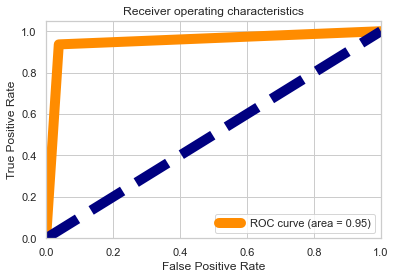

In [251]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

From above we can confirm that are Model is performing Well as the Area Under the Curve is Almost 95%

# Saving the best Model

In [252]:
import pickle

filename = 'Rainfall Tomorrow.pkl'

pickle.dump(et, open(filename,'wb'))  

# Conclusion

In [253]:
loaded_model = pickle.load(open('Rainfall Tomorrow.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9494760479041916


In [254]:
original=np.array(y_test).reshape(-1)
predicted=np.array(loaded_model.predict(x_test)).reshape(-1)
conclusion = pd.DataFrame({"Original":original,"Predicted":predicted}, index= range(len(original)))
conclusion

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
2667,0,0
2668,1,1
2669,0,1
2670,1,1


From above we can see that almost all the predicted & original values are matching. Hence our model is performing good.